## Lecture 1 Statistical Distributions
## Part 1: moments

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

start_date = datetime(2024,1,1)
end_date = datetime(2024,3,31)

In [3]:
## Understanding yfinance and its properties

In [37]:
# Preliminary Analysis 1
msft = yf.download('MSFT',start_date ,end_date)

# msft.info()
x = msft['Adj Close'].values
print('sample mean',np.mean(x))
print('sample standard deviation',np.std(x))
print('sample skewness: ',ss.skew(x, axis=0, bias=True))
print('sample kurtosis: ',ss.kurtosis(x, axis=0, bias=True) + 3)
print(msft.head())
print(msft['Adj Close'].describe()) # summary statistics

[*********************100%***********************]  1 of 1 completed

sample mean 403.00769743372183
sample standard deviation 15.156843724662025
sample skewness:  -0.8566557944820051
sample kurtosis:  3.264025339974553
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  373.859985  375.899994  366.769989  370.869995  368.854095   
2024-01-03  369.010010  373.260010  368.510010  370.600006  368.585571   
2024-01-04  370.670013  373.100006  367.170013  367.940002  365.940002   
2024-01-05  368.970001  372.059998  366.500000  367.750000  365.751068   
2024-01-08  369.299988  375.200012  369.010010  374.690002  372.653351   

              Volume  
Date                  
2024-01-02  25258600  
2024-01-03  23083500  
2024-01-04  20901500  
2024-01-05  20987000  
2024-01-08  23134000  
count     61.000000
mean     403.007697
std       15.282629
min      365.751068
25%      396.731720
50%      405.097839
75%      413.427795
max      427.825806
Name: Adj 

In [38]:
# Preliminary Analysis 2
tesla = yf.download('TSLA',start_date ,end_date)

# Discussion 3
y = tesla['Adj Close'].values
print('sample mean',np.mean(y))
print('sample standard deviation',np.std(y))
print('sample skewness: ',ss.skew(y, axis=0, bias=True))
print('sample kurtosis: ',ss.kurtosis(y, axis=0, bias=True) + 3)
print(tesla.head())
print(tesla['Adj Close'].describe()) # summary statistics

[*********************100%***********************]  1 of 1 completed

sample mean 195.3747546086546
sample standard deviation 21.066061612845882
sample skewness:  0.8067702773560321
sample kurtosis:  2.8288042849500057
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  250.080002  251.250000  244.410004  248.419998  248.419998   
2024-01-03  244.979996  245.679993  236.320007  238.449997  238.449997   
2024-01-04  239.250000  242.699997  237.729996  237.929993  237.929993   
2024-01-05  236.860001  240.119995  234.899994  237.490005  237.490005   
2024-01-08  236.139999  241.250000  235.300003  240.449997  240.449997   

               Volume  
Date                   
2024-01-02  104654200  
2024-01-03  121082600  
2024-01-04  102629300  
2024-01-05   92379400  
2024-01-08   85166600  
count     61.000000
mean     195.374755
std       21.240887
min      162.500000
25%      178.649994
50%      189.559998
75%      207.830002
max      248.419998
Name

In [39]:
# Preliminary Analysis 3
lululemon = yf.download('LULU',start_date ,end_date)

# Discussion 3
y = lululemon['Adj Close'].values
print('sample mean',np.mean(y))
print('sample standard deviation',np.std(y))
print('sample skewness: ',ss.skew(y, axis=0, bias=True))
print('sample kurtosis: ',ss.kurtosis(y, axis=0, bias=True) + 3)
print(lululemon.head())

# Disucssion 4
print(lululemon['Adj Close'].describe()) # summary statistics

[*********************100%***********************]  1 of 1 completed

sample mean 462.2616407050461
sample standard deviation 25.001069168802218
sample skewness:  -1.5835708318807373
sample kurtosis:  5.84046683876542
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  508.570007  508.920013  502.149994  505.380005  505.380005   
2024-01-03  501.890015  503.950012  496.690002  498.019989  498.019989   
2024-01-04  496.899994  502.000000  495.010010  496.000000  496.000000   
2024-01-05  495.920013  499.209991  490.690002  491.100006  491.100006   
2024-01-08  488.470001  493.489990  478.130005  491.480011  491.480011   

             Volume  
Date                 
2024-01-02  1187800  
2024-01-03  1029200  
2024-01-04  1174400  
2024-01-05  1121500  
2024-01-08  1827300  
count     61.000000
mean     462.261641
std       25.208550
min      386.140015
25%      456.730011
50%      465.549988
75%      477.450012
max      505.380005
Name: Adj Close, dt

### Skewness

To demonstrate distributions with positive skewness, negative skewness, and zero skewness, we can use common distributions that exhibit these properties:

- Positive Skewness: Exponential Distribution
- Negative Skewness: Beta Distribution (with parameters favoring skewness towards 0)
- Zero Skewness: Normal Distribution

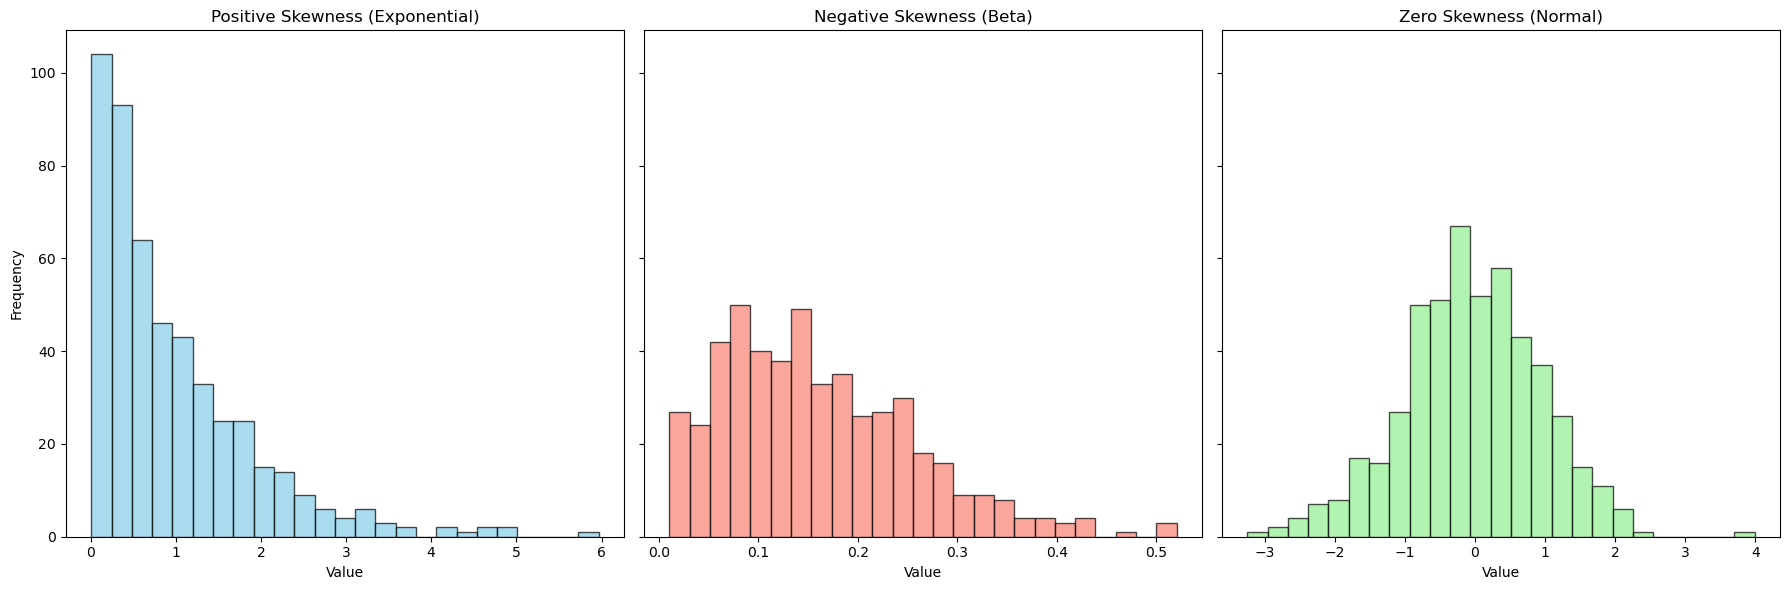

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, beta, norm

# Parameters
size = 500  # Sample size

# Generate data
data_positive_skew = expon.rvs(scale=1, size=size)
data_negative_skew = beta.rvs(a=2, b=10, size=size)  # a < b for negative skewness
data_zero_skew = norm.rvs(loc=0, scale=1, size=size)

# Create plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Positive Skewness
axs[0].hist(data_positive_skew, bins=25, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Positive Skewness (Exponential)')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Negative Skewness
axs[1].hist(data_negative_skew, bins=25, color='salmon', edgecolor='black', alpha=0.7)
axs[1].set_title('Negative Skewness (Beta)')
axs[1].set_xlabel('Value')

# Zero Skewness
axs[2].hist(data_zero_skew, bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
axs[2].set_title('Zero Skewness (Normal)')
axs[2].set_xlabel('Value')

plt.tight_layout()
plt.show()

### Kurtosis
To demonstrate distributions with different levels of kurtosis, we can use distributions that exhibit:

- Leptokurtosis (High Kurtosis): A distribution with heavy tails and a sharp peak, such as the t-distribution with a low degree of freedom.
- Mesokurtosis (Normal Kurtosis): A distribution with a standard peak and tails, such as the Normal Distribution.
- Platykurtosis (Low Kurtosis): A distribution with light tails and a flatter peak, such as the Uniform Distribution.

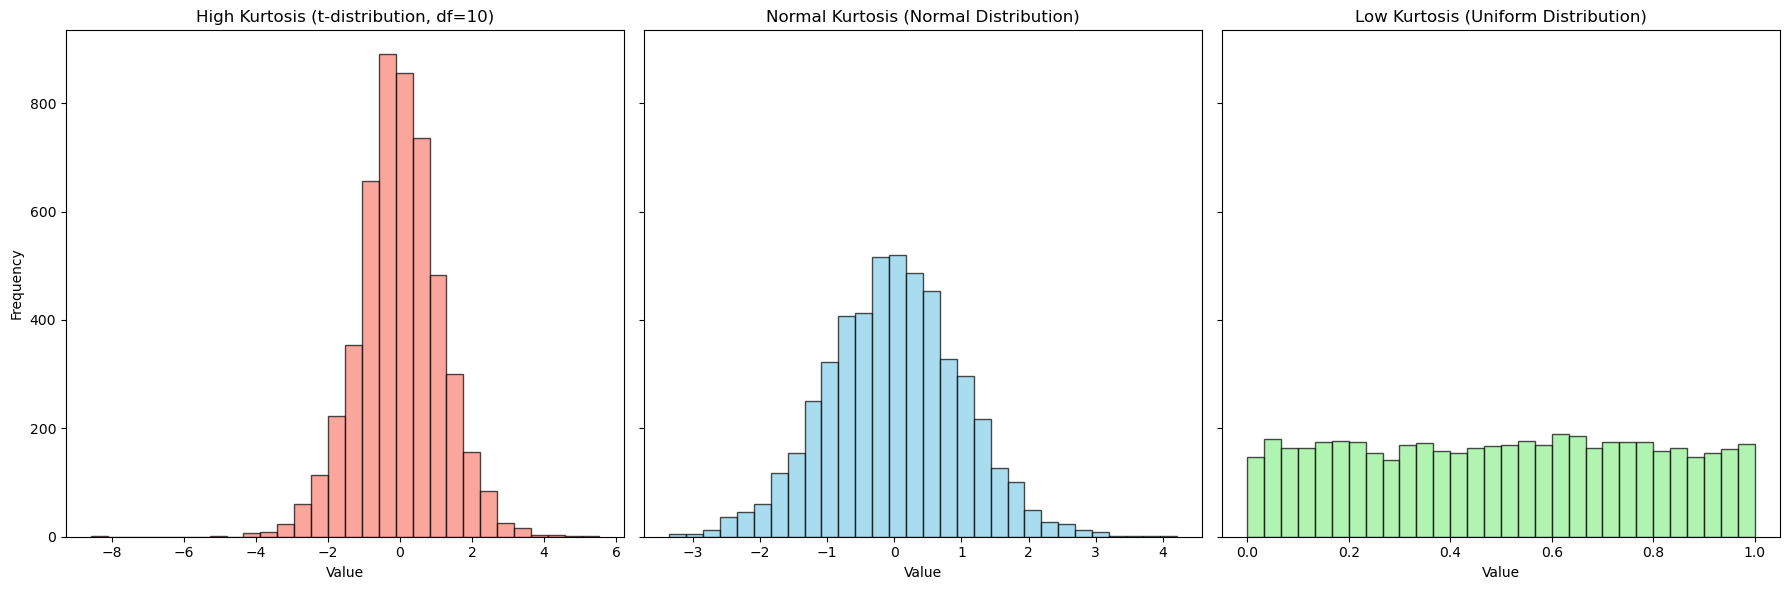

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, t

# Parameters
size = 5000  # Sample size
df = 10       # Degrees of freedom for t-distribution

# Generate data
data_high_kurtosis = t.rvs(df=df, size=size)
data_normal_kurtosis = norm.rvs(size=size)
data_low_kurtosis = uniform.rvs(size=size)

# Create plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# High Kurtosis (Leptokurtic)
axs[0].hist(data_high_kurtosis, bins=30, color='salmon', edgecolor='black', alpha=0.7)
axs[0].set_title(f'High Kurtosis (t-distribution, df={df})')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Normal Kurtosis (Mesokurtic)
axs[1].hist(data_normal_kurtosis, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axs[1].set_title('Normal Kurtosis (Normal Distribution)')
axs[1].set_xlabel('Value')

# Low Kurtosis (Platykurtic)
axs[2].hist(data_low_kurtosis, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axs[2].set_title('Low Kurtosis (Uniform Distribution)')
axs[2].set_xlabel('Value')

plt.tight_layout()
plt.show()

### Kurtosis in Tesla Stock

[*********************100%***********************]  1 of 1 completed


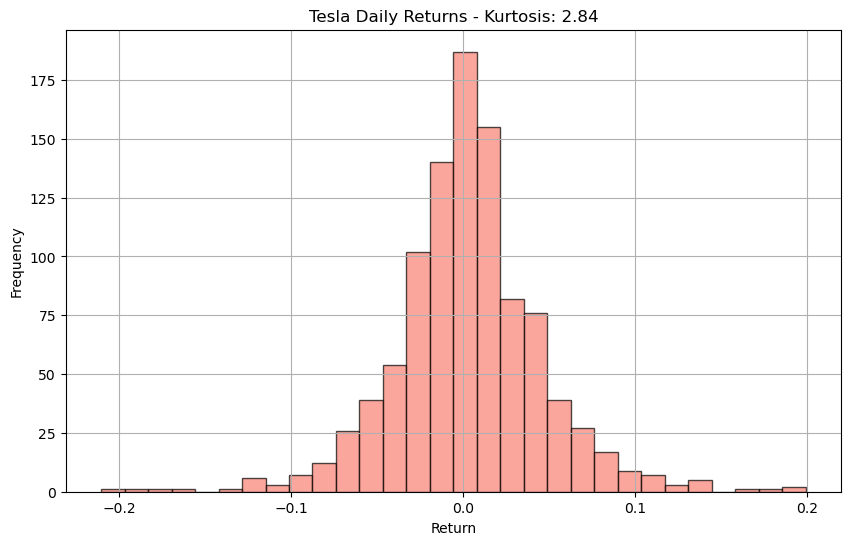

In [56]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Fetch historical data for Tesla
ticker = 'TSLA'
start_date = '2020-01-01'
end_date = '2024-01-01'

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
data['Return'] = data['Adj Close'].pct_change()

# Drop NaN values
returns = data['Return'].dropna()

# Calculate kurtosis
kurt = kurtosis(returns)

# Create the histogram plot
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.title(f'Tesla Daily Returns - Kurtosis: {kurt:.2f}')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
